# Read ASC files

## Import libraries

In [1]:
import glob, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
#import rasterio as rio
from osgeo import gdal
import numpy as np
from osgeo import osr

## Read gpkg files

<Axes: >

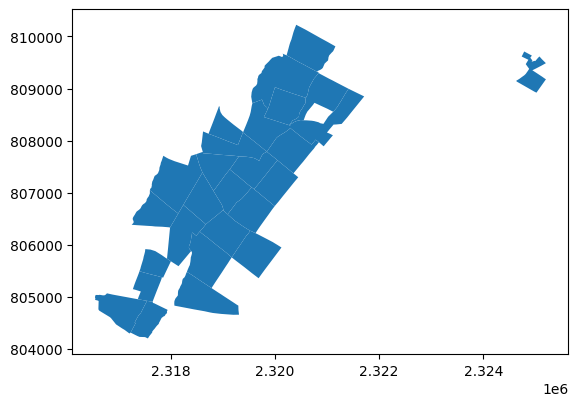

In [25]:
agebs = gpd.read_file("data/colima/agebs.gpkg")
agebs.plot()

In [30]:
gpkg_files = glob.glob('data/zonalStats/*.gpkg')
gpkg_files[:5]

['data/zonalStats\\Depth_0.gpkg',
 'data/zonalStats\\Depth_10200.gpkg',
 'data/zonalStats\\Depth_10500.gpkg',
 'data/zonalStats\\Depth_10800.gpkg',
 'data/zonalStats\\Depth_11100.gpkg']

In [40]:
gpkg_files[0].split('\\')[1].split('.')[0].split('_')

['Depth', '0']

In [43]:
magaGDF = pd.DataFrame()

for file in gpkg_files:
  gpkg_gdf = gpd.read_file(file)
  
  metadata = file.split('\\')[1].split('.')[0].split('_')

  gpkg_gdf["class"] = metadata[0]
  gpkg_gdf["time"] = metadata[1]
  
  
  gpkg_gdf = gpkg_gdf[gpkg_gdf["CVE_AGEB"].isin(agebs["CVE_AGEB"])]
  magaGDF = pd.concat([magaGDF, gpkg_gdf], ignore_index=True)
  
magaGDF = gpd.GeoDataFrame(magaGDF, geometry='geometry')
magaGDF.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,_count,_sum,_mean,geometry,class,time
0,0600200010676,06,002,0001,0676,0.0,0.0,NaN,"MULTIPOLYGON (((634027.336 2129950.192, 634132...",Depth,0
1,0600200010727,06,002,0001,0727,0.0,0.0,NaN,"MULTIPOLYGON (((633395.848 2129528.302, 633418...",Depth,0
2,0600200011142,06,002,0001,1142,0.0,0.0,NaN,"MULTIPOLYGON (((631778.801 2126986.659, 631993...",Depth,0
3,0600200010411,06,002,0001,0411,0.0,0.0,NaN,"MULTIPOLYGON (((634633.921 2130685.137, 634669...",Depth,0
4,0600200011068,06,002,0001,1068,0.0,0.0,NaN,"MULTIPOLYGON (((635037.162 2131658.661, 635037...",Depth,0


In [46]:
magaGDF.drop(columns=["geometry"], inplace=True)
magaGDF.to_csv("data/megaGDF.csv", index=False)

In [45]:
magaGDF["class"].value_counts()

Depth       2214
Rain        2187
Velocity    2160
Name: class, dtype: int64